In [97]:
import matplotlib.pyplot as plt
import matplotlib
import librosa
import librosa.display
import pandas as pd
import numpy as np
import seaborn as sns
from fastdtw import fastdtw
from typing import Callable

nutcracker = librosa.example('nutcracker')
brahms = librosa.example("brahms")

audio_nut, sr_nut = librosa.load(nutcracker)
audio_brah, sr_brah = librosa.load(brahms)

print(nutcracker)


/Users/duongtat/Library/Caches/librosa/Kevin_MacLeod_-_P_I_Tchaikovsky_Dance_of_the_Sugar_Plum_Fairy.ogg


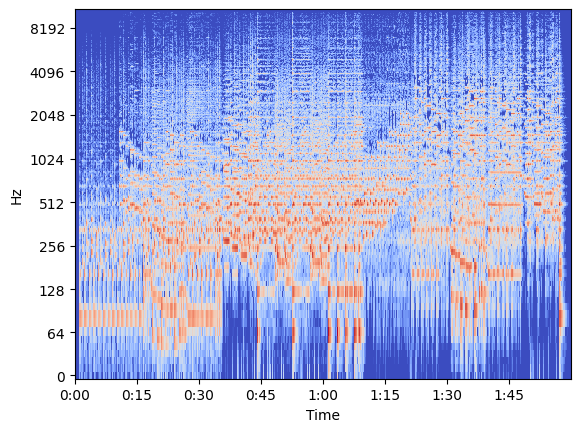

In [108]:
S = np.abs(librosa.stft(y=audio_nut, n_fft=2048, hop_length=512))


freq_bins, frames = S.shape

time_segments = librosa.frames_to_time(
    np.arange(frames),
    sr=sr_nut,
    hop_length=512,
)

frequencies = librosa.fft_frequencies(sr=sr_nut, n_fft=2048)
librosa.display.specshow(librosa.amplitude_to_db(S), y_axis="log", x_axis="time")


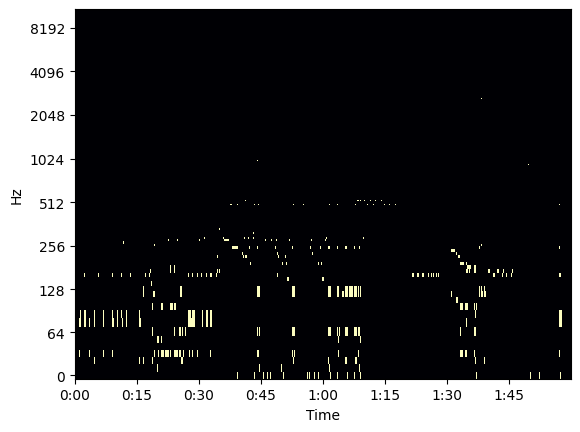

In [164]:
limits = [40, 80, 120, 180, 300]
limits_len = len(limits)

def getFreqBand(freq):
    res = 0
    for check in limits:
        if freq >= check:
            res += 1
        else:
            break
    return res


band_mask = np.array([getFreqBand(freq) for freq in frequencies])

result = np.zeros_like(S)

for band in range(limits_len + 1):
    start = np.argmax(band_mask == band)
    end = np.argmax(band_mask > band) if band != limits_len else len(band_mask)

    max_idx = np.max(S[start:end], axis=1)

    freq_band = S[start:end]
    idx_band = np.argmax(freq_band, axis=0)
    value_band = np.max(freq_band, axis=0)

    mask_band = value_band < (np.mean(value_band) * 2)

    result_band = start + idx_band

    for coord, mask in np.ndenumerate(mask_band):
        if (mask == False):
            result[result_band[coord], coord[-1]] = 1

librosa.display.specshow(result, y_axis="log", x_axis="time")

In [203]:
time_segments = librosa.frames_to_time(
    np.arange(frames),
    sr=sr_nut,
    hop_length=512,
)

frequencies = librosa.fft_frequencies(sr=sr_nut, n_fft=2048)


def test(x):
    freq, time = x
    return np.array([np.floor(frequencies[freq]), time_segments[time]],)


x = np.apply_along_axis(test, 1, np.argwhere(result > 0))


<AxesSubplot: xlabel='time', ylabel='freq'>

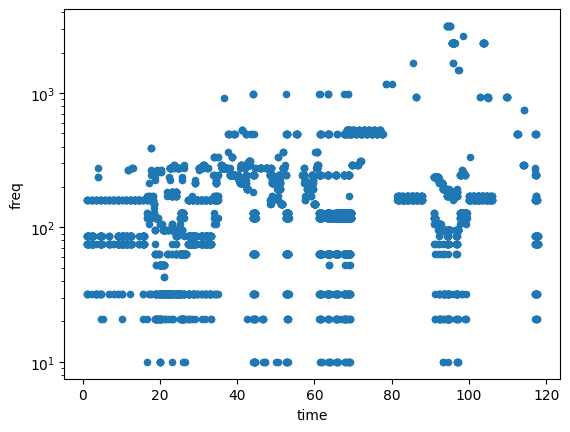

In [208]:
df = pd.DataFrame(x, columns=["freq", "time"])
df.plot.scatter(x="time", y="freq", logy=True)

In [211]:
df.sort_values(by=["time", "freq"], inplace=True)

In [241]:
tmp_time = []
tmp_freq = []

window = 5

hashes = []
for idx, row in df.iterrows():

    if (len(tmp_time) >= window):
        hashes.append((",".join([str(int(x)) for x in tmp_freq]), tmp_time[0]))
        tmp_freq.pop(0)
        tmp_time.pop(0)

    tmp_time.append(row["time"])
    tmp_freq.append(row["freq"])

hashes


[('32,75,75,86,75', 1.1609977324263039),
 ('75,75,86,75,86', 1.1609977324263039),
 ('75,86,75,86,161', 1.18421768707483),
 ('86,75,86,161,75', 1.18421768707483),
 ('75,86,161,75,86', 1.207437641723356),
 ('86,161,75,86,161', 1.207437641723356),
 ('161,75,86,161,32', 1.207437641723356),
 ('75,86,161,32,75', 1.230657596371882),
 ('86,161,32,75,86', 1.230657596371882),
 ('161,32,75,86,161', 1.230657596371882),
 ('32,75,86,161,32', 1.253877551020408),
 ('75,86,161,32,75', 1.253877551020408),
 ('86,161,32,75,86', 1.253877551020408),
 ('161,32,75,86,161', 1.253877551020408),
 ('32,75,86,161,32', 1.2770975056689342),
 ('75,86,161,32,75', 1.2770975056689342),
 ('86,161,32,75,86', 1.2770975056689342),
 ('161,32,75,86,161', 1.2770975056689342),
 ('32,75,86,161,75', 1.3003174603174603),
 ('75,86,161,75,86', 1.3003174603174603),
 ('86,161,75,86,75', 1.3003174603174603),
 ('161,75,86,75,86', 1.3003174603174603),
 ('75,86,75,86,75', 1.3235374149659864),
 ('86,75,86,75,86', 1.3235374149659864),
 ('75